# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **02/11/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Atividade: K-Means

**Geração aleatória de dados iniciais**

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import numpy as np

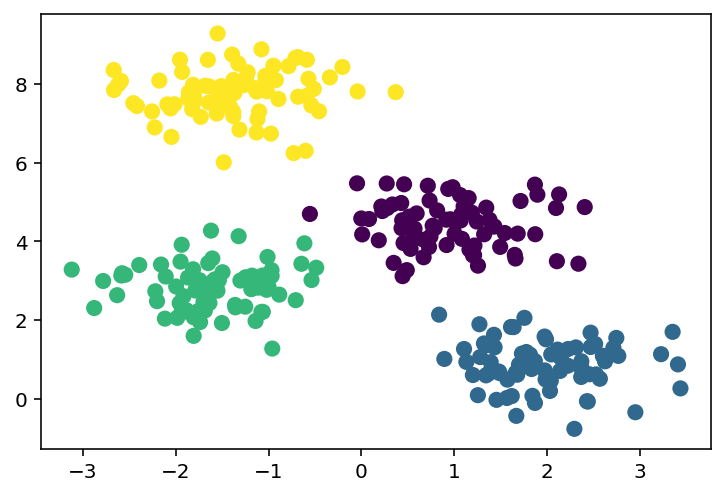

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')


**Implementação**

**TODO:** Implemente o algoritmo do k-means e o pipeline de treinamento e teste para os dados iniciais

In [3]:
class KMeans:
    
    #inicialização com n clusters, sendo 4 por default)
    def __init__(self, n_clusters=4):
        self.K = n_clusters

    #fit inicializa centroids aleatorios e interação updates do centroide e labels (atraves das funções compute_label e update_centroids) até achar um label
    #novo que seja igual ao anterior, ou seja, finalizar de convergir
    def fit(self, X):
        
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label, self.labels = None, np.zeros(len(X))
        
        while not np.all(self.labels == self.prev_label):
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
            
        return self

    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x) ** 2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array(
            [np.mean(X[self.labels == k], axis=0) for k in range(self.K)]
        )


In [4]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)

**TODO:** Faça um novo *plot* os dados, considerando:

*   A utilização dos grupos preditos pelo algoritmo como referência (mudança no parâmetro `c` do `plt.scatter`)
*   O plot dos centroides sobre os dados



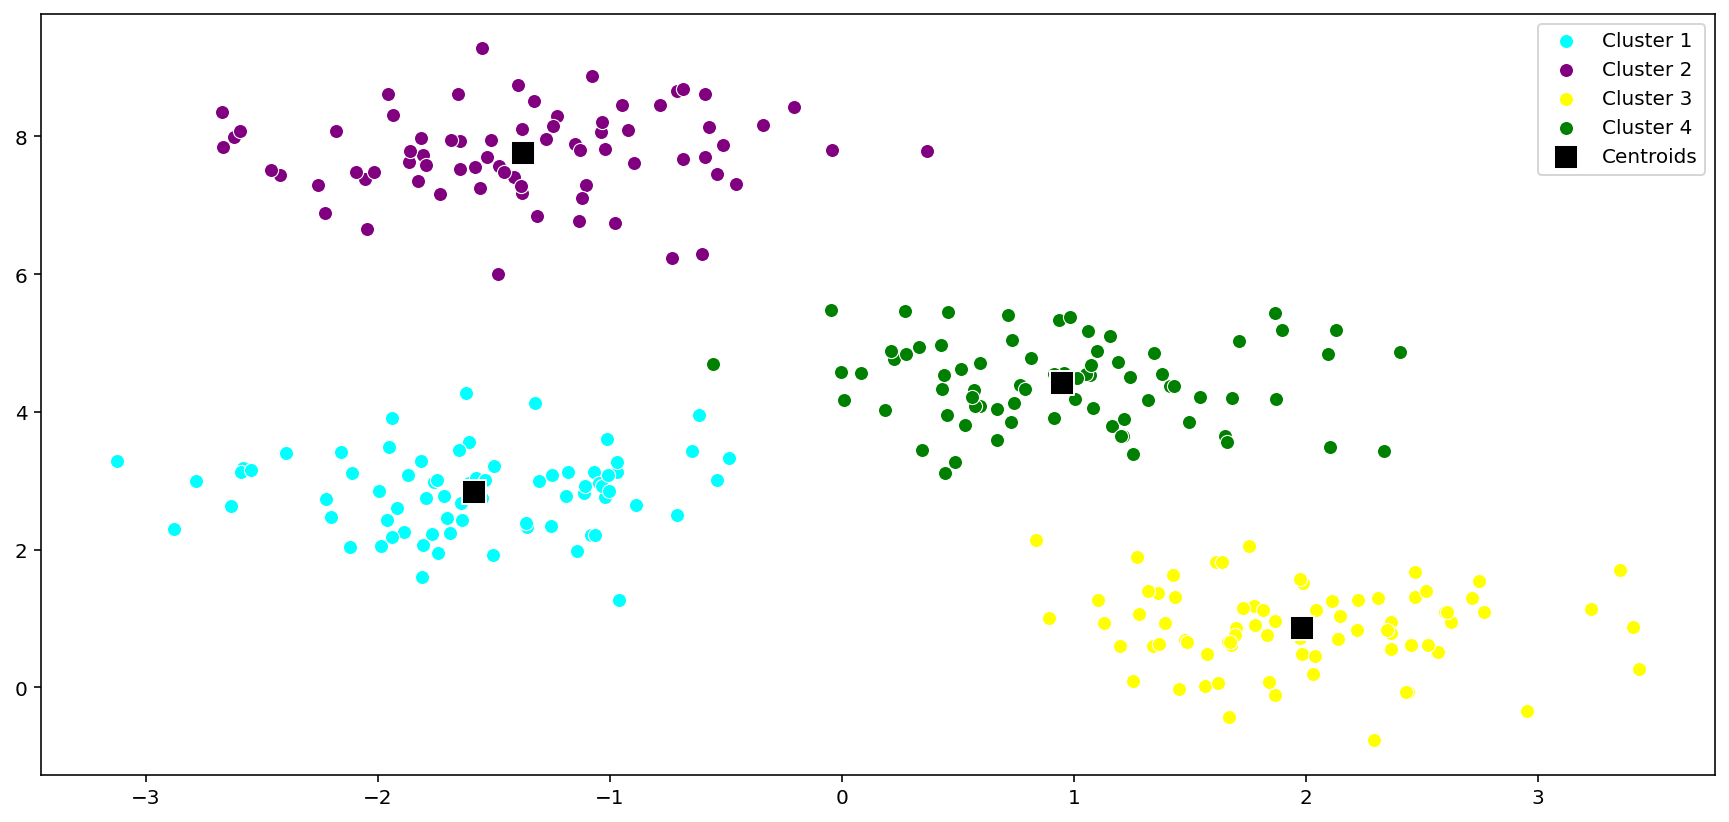

In [5]:
import seaborn as sns

plt.figure(figsize=(15,7))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'cyan', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'yellow', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans.centroids[:, 0], kmeans.centroids[:,1], color = 'black', label = 'Centroids',s=150,marker=',')

plt.show()

**Aplicação**

Agora, utilize o algoritmo implementado no dataset `digits`

`load_digits`

In [6]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

np.random.seed(0)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

**TODO:** treine o modelo para o dataset digits

In [7]:
from sklearn.decomposition import PCA

h = .02
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=10).fit(reduced_data)
y_kmeans = kmeans.predict(reduced_data)

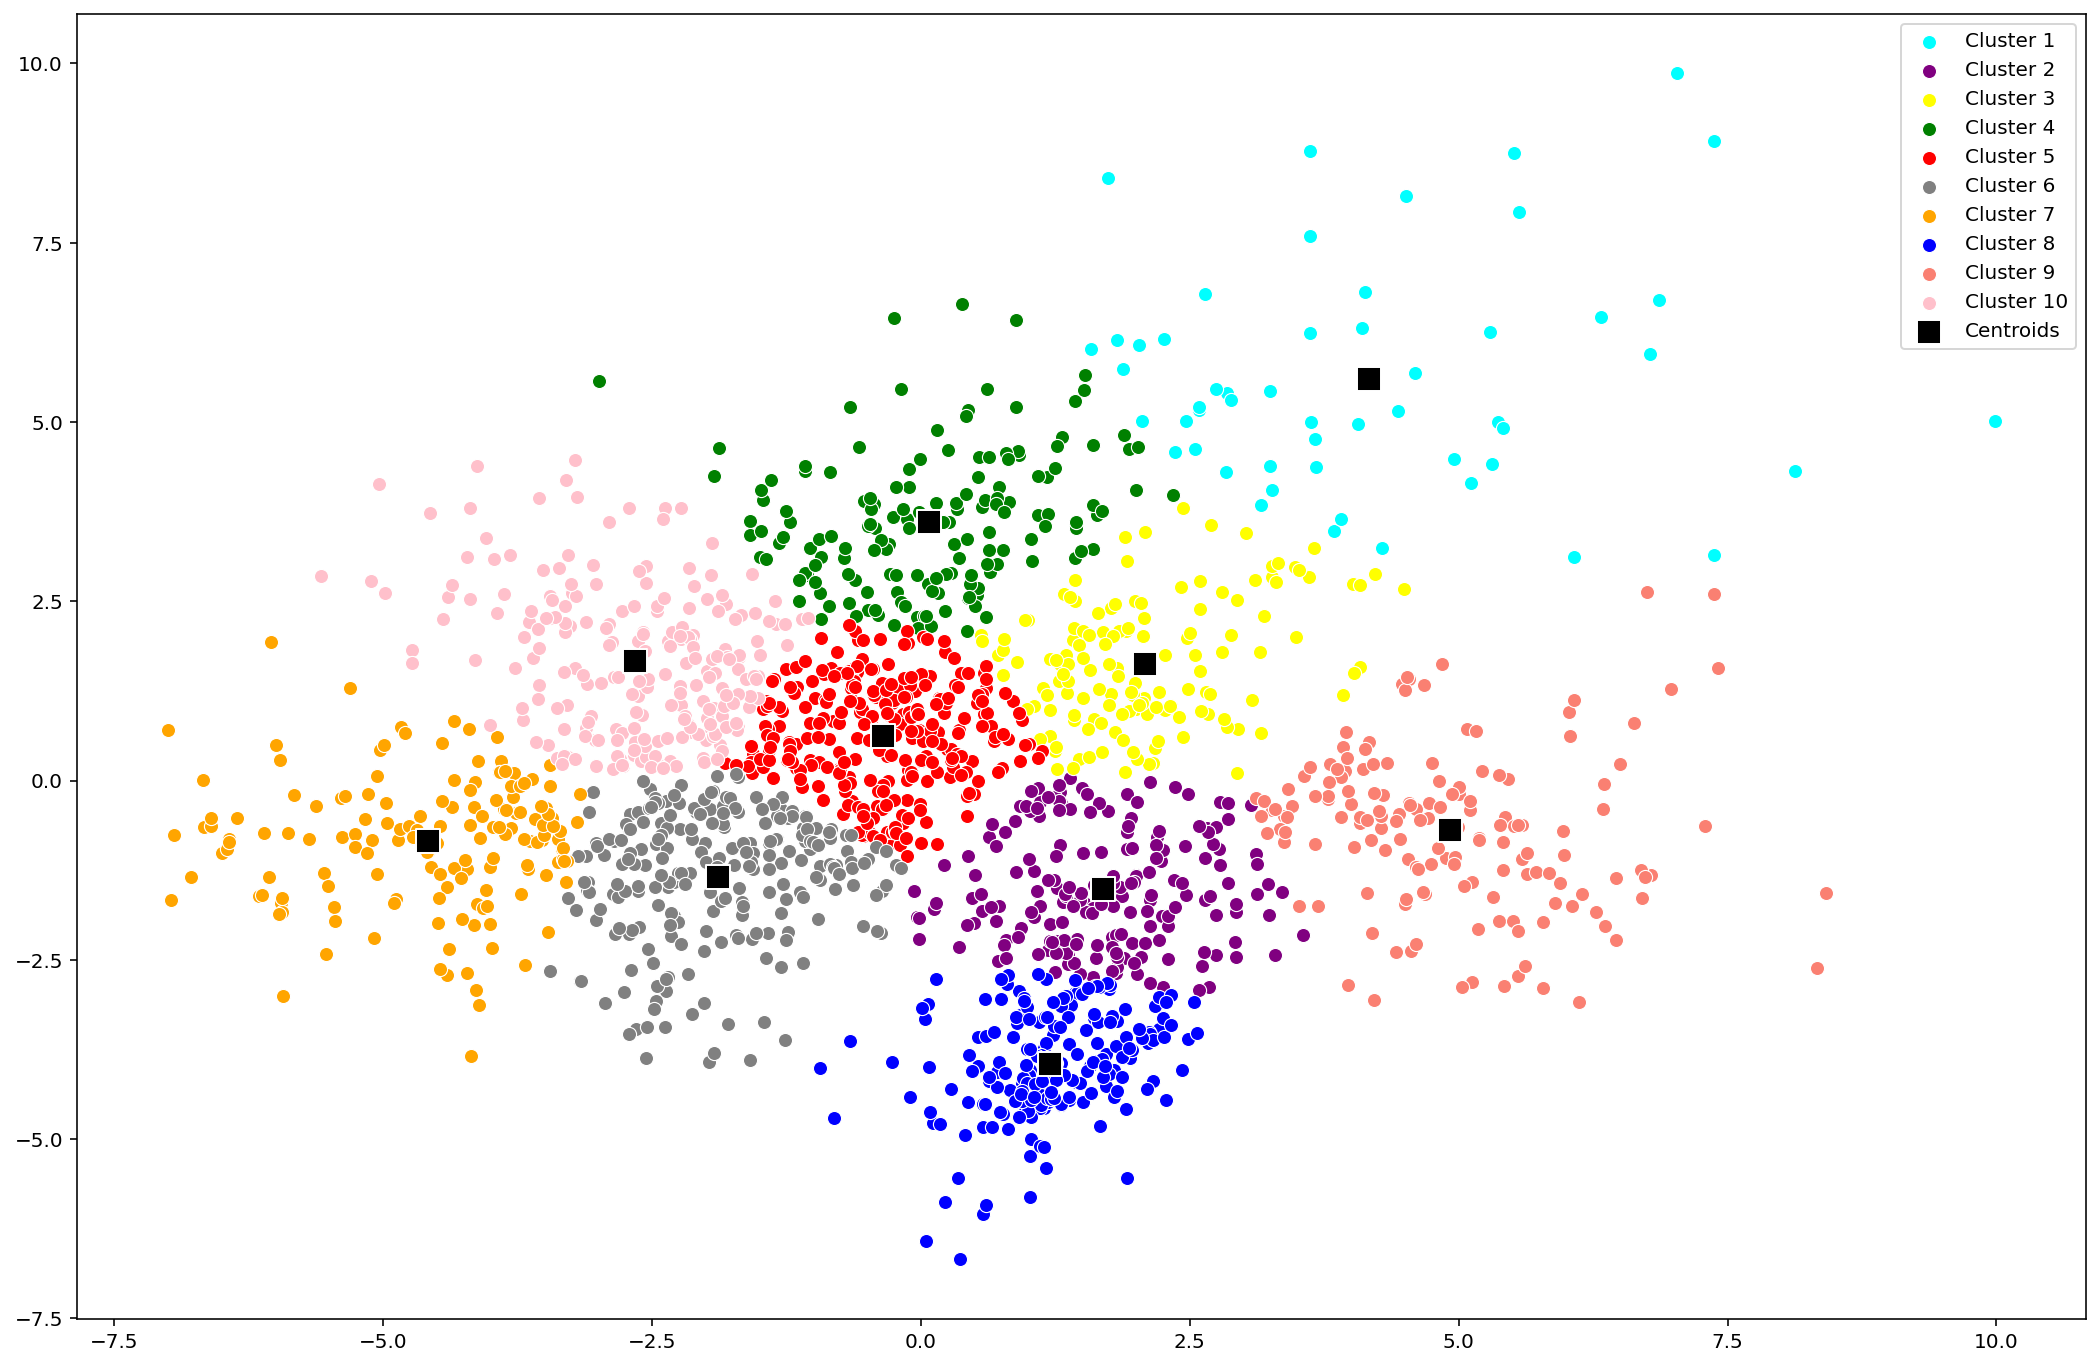

In [8]:
plt.figure(figsize=(18,12))

sns.scatterplot(reduced_data[y_kmeans == 0, 0], reduced_data[y_kmeans == 0, 1], color = 'cyan', label = 'Cluster 1',s=50)
sns.scatterplot(reduced_data[y_kmeans == 1, 0], reduced_data[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(reduced_data[y_kmeans == 2, 0], reduced_data[y_kmeans == 2, 1], color = 'yellow', label = 'Cluster 3',s=50)
sns.scatterplot(reduced_data[y_kmeans == 3, 0], reduced_data[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4',s=50)
sns.scatterplot(reduced_data[y_kmeans == 4, 0], reduced_data[y_kmeans == 4, 1], color = 'red', label = 'Cluster 5',s=50)
sns.scatterplot(reduced_data[y_kmeans == 5, 0], reduced_data[y_kmeans == 5, 1], color = 'grey', label = 'Cluster 6',s=50)
sns.scatterplot(reduced_data[y_kmeans == 6, 0], reduced_data[y_kmeans == 6, 1], color = 'orange', label = 'Cluster 7',s=50)
sns.scatterplot(reduced_data[y_kmeans == 7, 0], reduced_data[y_kmeans == 7, 1], color = 'blue', label = 'Cluster 8',s=50)
sns.scatterplot(reduced_data[y_kmeans == 8, 0], reduced_data[y_kmeans == 8, 1], color = 'salmon', label = 'Cluster 9',s=50)
sns.scatterplot(reduced_data[y_kmeans == 9, 0], reduced_data[y_kmeans == 9, 1], color = 'pink', label = 'Cluster 10',s=50)

#plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', c=labels)
sns.scatterplot(kmeans.centroids[:, 0], kmeans.centroids[:,1], color = 'black', label = 'Centroids',s=150,marker=',')

plt.show()